In [1]:
%cd ..

E:\Coding\PlasmaChemistry


In [2]:
import numpy as np
import pandas as pd
import yaml
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
import re

In [3]:
from plasmistry.reactions import (Reactions, CoefReactions, CrosReactions)

In [4]:
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 14

In [5]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

# Read reactions

In [8]:
file_name_list = ['_pkl/rctn_df_CO2_VT_with_CO2.pkl',
                  '_pkl/rctn_df_CO2_VT_with_CO2_reversed.pkl']
_df = pd.DataFrame(columns=['formula','reactant', 'product', 'type', 'kstr'])
for file_name in file_name_list:
    _df = _df.append(pd.read_pickle(file_name), ignore_index=True)
rctn_df = _df

In [9]:
coef = CoefReactions(reactant=rctn_df['reactant'],
                     product=rctn_df['product'],
                     k_str=rctn_df['kstr'])

In [10]:
coef.compile_k_str()

In [11]:
coef.set_rate_const(Tgas_K=1000, EN_Td=1, Te_eV=0)

In [12]:
print(coef)


        
====SPECIES====
        
0           CO
1          CO2
2      CO2(v1)
3     CO2(v10)
4     CO2(v11)
5     CO2(v12)
6     CO2(v13)
7     CO2(v14)
8     CO2(v15)
9     CO2(v16)
10    CO2(v17)
11    CO2(v18)
12    CO2(v19)
13     CO2(v2)
14    CO2(v20)
15    CO2(v21)
16     CO2(v3)
17     CO2(v4)
18     CO2(v5)
19     CO2(v6)
20     CO2(v7)
21     CO2(v8)
22     CO2(v9)
dtype: object
        
====REACTIONS====
        
 columns: reactions dH_g[eV] dH_e[eV] k_str rate_const rate
        
                         reactions  dH_g[eV]  dH_e[eV]  \
0         CO2(v1) + CO => CO2 + CO   0.0e+00   0.0e+00   
1     CO2(v2) + CO => CO2(v1) + CO   0.0e+00   0.0e+00   
2     CO2(v3) + CO => CO2(v2) + CO   0.0e+00   0.0e+00   
3     CO2(v4) + CO => CO2(v3) + CO   0.0e+00   0.0e+00   
4     CO2(v5) + CO => CO2(v4) + CO   0.0e+00   0.0e+00   
5     CO2(v6) + CO => CO2(v5) + CO   0.0e+00   0.0e+00   
6     CO2(v7) + CO => CO2(v6) + CO   0.0e+00   0.0e+00   
7     CO2(v8) + CO => CO2(v7) + CO   

In [13]:
coef.set_rate(density=np.arange(1,24)*1e22)

In [14]:
print(coef)


        
====SPECIES====
        
0           CO
1          CO2
2      CO2(v1)
3     CO2(v10)
4     CO2(v11)
5     CO2(v12)
6     CO2(v13)
7     CO2(v14)
8     CO2(v15)
9     CO2(v16)
10    CO2(v17)
11    CO2(v18)
12    CO2(v19)
13     CO2(v2)
14    CO2(v20)
15    CO2(v21)
16     CO2(v3)
17     CO2(v4)
18     CO2(v5)
19     CO2(v6)
20     CO2(v7)
21     CO2(v8)
22     CO2(v9)
dtype: object
        
====REACTIONS====
        
 columns: reactions dH_g[eV] dH_e[eV] k_str rate_const rate
        
                         reactions  dH_g[eV]  dH_e[eV]  \
0         CO2(v1) + CO => CO2 + CO   0.0e+00   0.0e+00   
1     CO2(v2) + CO => CO2(v1) + CO   0.0e+00   0.0e+00   
2     CO2(v3) + CO => CO2(v2) + CO   0.0e+00   0.0e+00   
3     CO2(v4) + CO => CO2(v3) + CO   0.0e+00   0.0e+00   
4     CO2(v5) + CO => CO2(v4) + CO   0.0e+00   0.0e+00   
5     CO2(v6) + CO => CO2(v5) + CO   0.0e+00   0.0e+00   
6     CO2(v7) + CO => CO2(v6) + CO   0.0e+00   0.0e+00   
7     CO2(v8) + CO => CO2(v7) + CO   

In [15]:
coef.k_str[0]

'(((0.425)*exp((-407)*Tgas**(-1/3)+(824)*Tgas**(-2/3)))+((0.425)*exp((-404)*Tgas**(-1/3)+(1096)*Tgas**(-2/3)))+((0.425)*exp((-252)*Tgas**(-1/3)+(685)*Tgas**(-2/3))))*(0.5*(3-exp(-2/3*(0.32*3379.9038207443914/(4.587156)*sqrt((22)/Tgas))))*exp(-2/3*(0.32*3379.9038207443914/(4.587156)*sqrt((22)/Tgas))))'

In [16]:
coef.k_str[21]

'(((0.425)*exp((-407)*Tgas**(-1/3)+(824)*Tgas**(-2/3)))+((0.425)*exp((-404)*Tgas**(-1/3)+(1096)*Tgas**(-2/3)))+((0.425)*exp((-252)*Tgas**(-1/3)+(685)*Tgas**(-2/3))))*(0.5*(3-exp(-2/3*(0.32*3379.9038207443914/(4.587156)*sqrt((22)/Tgas))))*exp(-2/3*(0.32*3379.9038207443914/(4.587156)*sqrt((22)/Tgas))))*exp(-3379.9038207443914/Tgas)'

In [17]:
y0 = np.arange(1,24)*1e22
def dndt(t, y):
    coef.set_rate_const(Tgas_K=5000)
    coef.set_rate(density=y)
    return coef.get_dn()

In [18]:
time_span = [0, 1e3]
sol = solve_ivp(dndt, time_span, y0, method='BDF')

In [19]:
sol.t

array([0.0e+00, 1.0e-15, 2.0e-15, 1.2e-14, 2.2e-14, 6.1e-14, 9.9e-14, 1.4e-13, 2.1e-13, 2.8e-13, 3.6e-13, 4.3e-13, 5.1e-13,
       5.9e-13, 6.7e-13, 7.5e-13, 8.9e-13, 1.0e-12, 1.2e-12, 1.3e-12, 1.5e-12, 1.7e-12, 1.9e-12, 2.1e-12, 2.4e-12, 2.7e-12,
       3.0e-12, 3.3e-12, 3.7e-12, 4.1e-12, 4.5e-12, 4.8e-12, 5.3e-12, 5.8e-12, 6.4e-12, 6.9e-12, 7.4e-12, 8.1e-12, 8.8e-12,
       9.6e-12, 1.0e-11, 1.1e-11, 1.2e-11, 1.3e-11, 1.4e-11, 1.5e-11, 1.6e-11, 1.7e-11, 1.8e-11, 1.9e-11, 2.0e-11, 2.1e-11,
       2.3e-11, 2.4e-11, 2.6e-11, 2.7e-11, 2.8e-11, 3.0e-11, 3.2e-11, 3.3e-11, 3.5e-11, 3.7e-11, 3.9e-11, 4.1e-11, 4.3e-11,
       4.5e-11, 4.7e-11, 4.9e-11, 5.2e-11, 5.5e-11, 5.7e-11, 6.0e-11, 6.4e-11, 6.7e-11, 7.1e-11, 7.5e-11, 7.9e-11, 8.5e-11,
       9.1e-11, 9.7e-11, 1.0e-10, 1.2e-10, 1.4e-10, 1.6e-10, 3.1e-10, 4.5e-10, 1.9e-09, 3.4e-09, 1.8e-08, 3.2e-08, 1.8e-07,
       3.2e-07, 1.8e-06, 3.2e-06, 1.8e-05, 3.2e-05, 1.8e-04, 3.2e-04, 1.8e-03, 3.2e-03, 1.8e-02, 3.2e-02, 1.8e-01, 3.2e-01,
       1

In [20]:
sol.y

array([[1.0e+22, 1.0e+22, 1.0e+22, 1.0e+22, 1.0e+22, ..., 1.0e+22, 1.0e+22, 1.0e+22, 1.0e+22, 1.0e+22],
       [2.0e+22, 2.0e+22, 2.0e+22, 2.0e+22, 2.0e+22, ..., 1.3e+24, 1.3e+24, 1.3e+24, 1.3e+24, 1.3e+24],
       [3.0e+22, 3.0e+22, 3.0e+22, 3.1e+22, 3.2e+22, ..., 6.8e+23, 6.8e+23, 6.8e+23, 6.8e+23, 6.8e+23],
       [4.0e+22, 4.0e+22, 4.0e+22, 4.3e+22, 4.5e+22, ..., 2.1e+21, 2.1e+21, 2.1e+21, 2.1e+21, 2.1e+21],
       [5.0e+22, 5.0e+22, 5.0e+22, 5.0e+22, 5.1e+22, ..., 1.2e+21, 1.2e+21, 1.2e+21, 1.2e+21, 1.2e+21],
       ...,
       [1.9e+23, 1.9e+23, 1.9e+23, 1.9e+23, 1.9e+23, ..., 4.9e+22, 4.9e+22, 4.9e+22, 4.9e+22, 4.9e+22],
       [2.0e+23, 2.0e+23, 2.0e+23, 2.0e+23, 2.0e+23, ..., 2.6e+22, 2.6e+22, 2.6e+22, 2.6e+22, 2.6e+22],
       [2.1e+23, 2.1e+23, 2.1e+23, 2.1e+23, 2.1e+23, ..., 1.4e+22, 1.4e+22, 1.4e+22, 1.4e+22, 1.4e+22],
       [2.2e+23, 2.2e+23, 2.2e+23, 2.2e+23, 2.2e+23, ..., 7.3e+21, 7.3e+21, 7.3e+21, 7.3e+21, 7.3e+21],
       [2.3e+23, 2.3e+23, 2.3e+23, 2.3e+23, 2.2e+23,

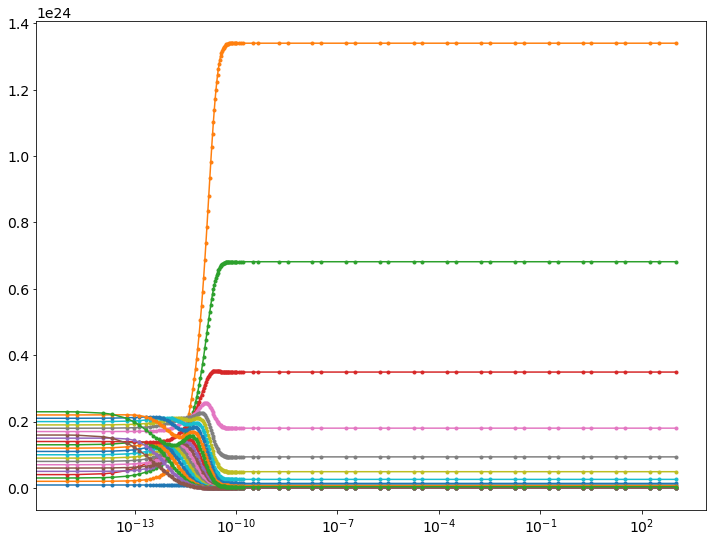

In [21]:
plt.semilogx(sol.t, sol.y.transpose(), marker='.')

In [22]:
coef.view_density(sol.y.transpose()[-1]).sort_values(by=['density'],ascending=False)

,density,ratio
CO2,1.3e+24,48.6%
CO2(v1),6.8e+23,24.7%
CO2(v2),3.5e+23,12.7%
CO2(v3),1.8e+23,6.5%
CO2(v4),9.4e+22,3.4%
CO2(v5),4.9e+22,1.8%
CO2(v6),2.6e+22,0.9%
CO2(v7),1.4e+22,0.5%
CO,1.0e+22,0.4%
CO2(v8),7.3e+21,0.3%
